<a href="https://colab.research.google.com/github/Rylan-Lewis/Machine-Learning/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
dataset_url = '/content/drive/MyDrive/ML/LogisticRegression/Titanic-Dataset.csv'

In [39]:
df=pd.read_csv(dataset_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
arr=['PassengerId','Name','Ticket','Cabin']
for i in range(len(arr)):
  df.drop(arr[i],axis=1,inplace=True)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [43]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

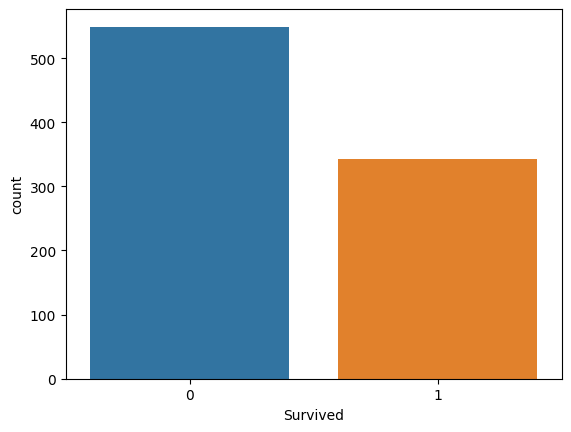

In [45]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

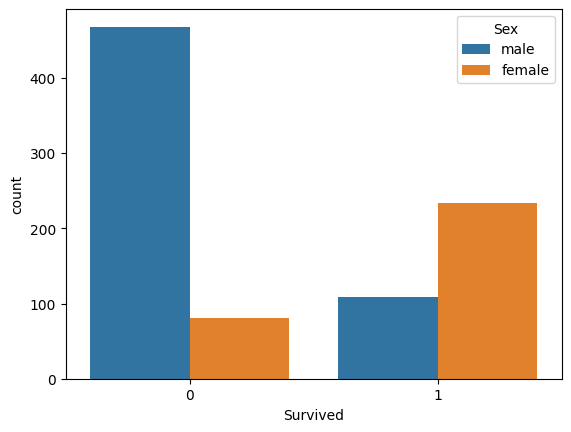

In [46]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

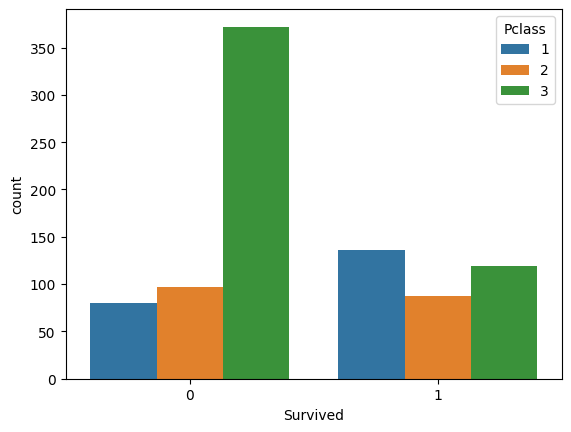

In [47]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: xlabel='Survived', ylabel='count'>

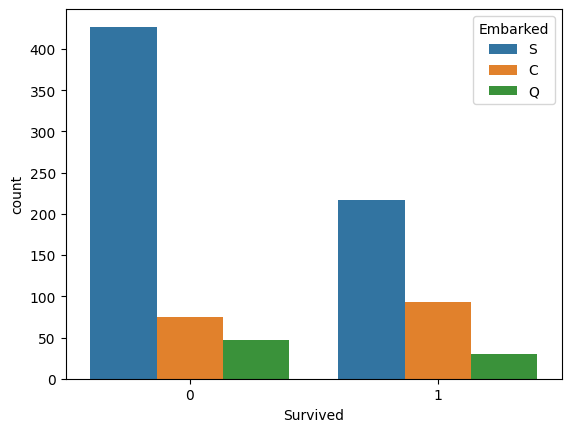

In [48]:
sns.countplot(x='Survived',hue='Embarked',data=df)

<Axes: xlabel='Survived', ylabel='count'>

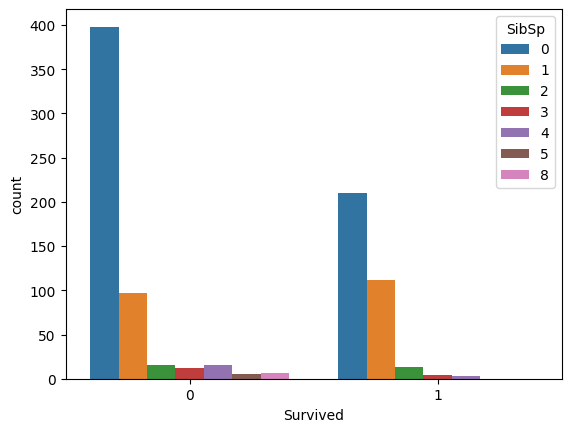

In [49]:
sns.countplot(x='Survived',hue='SibSp',data=df)

<Axes: xlabel='Survived', ylabel='count'>

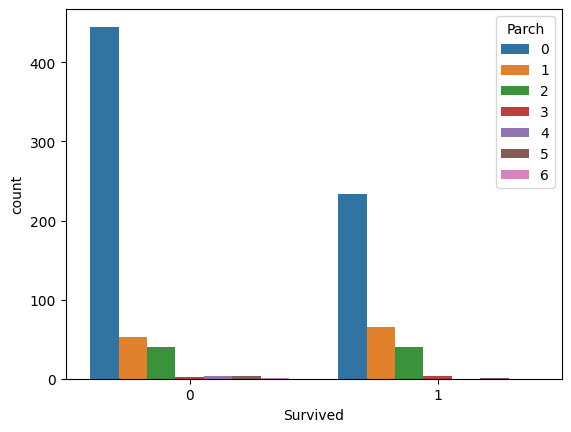

In [50]:
sns.countplot(x='Survived',hue='Parch',data=df)

<Axes: ylabel='Frequency'>

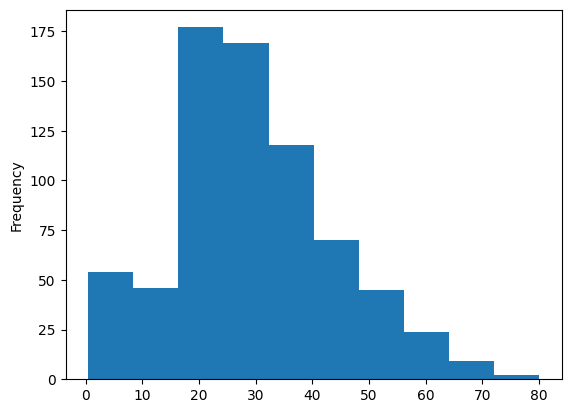

In [51]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

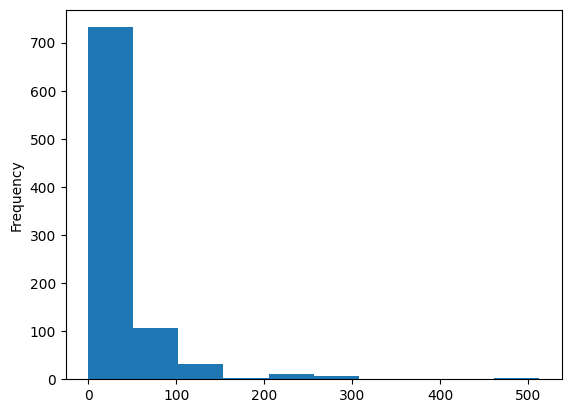

In [52]:
df['Fare'].plot.hist()

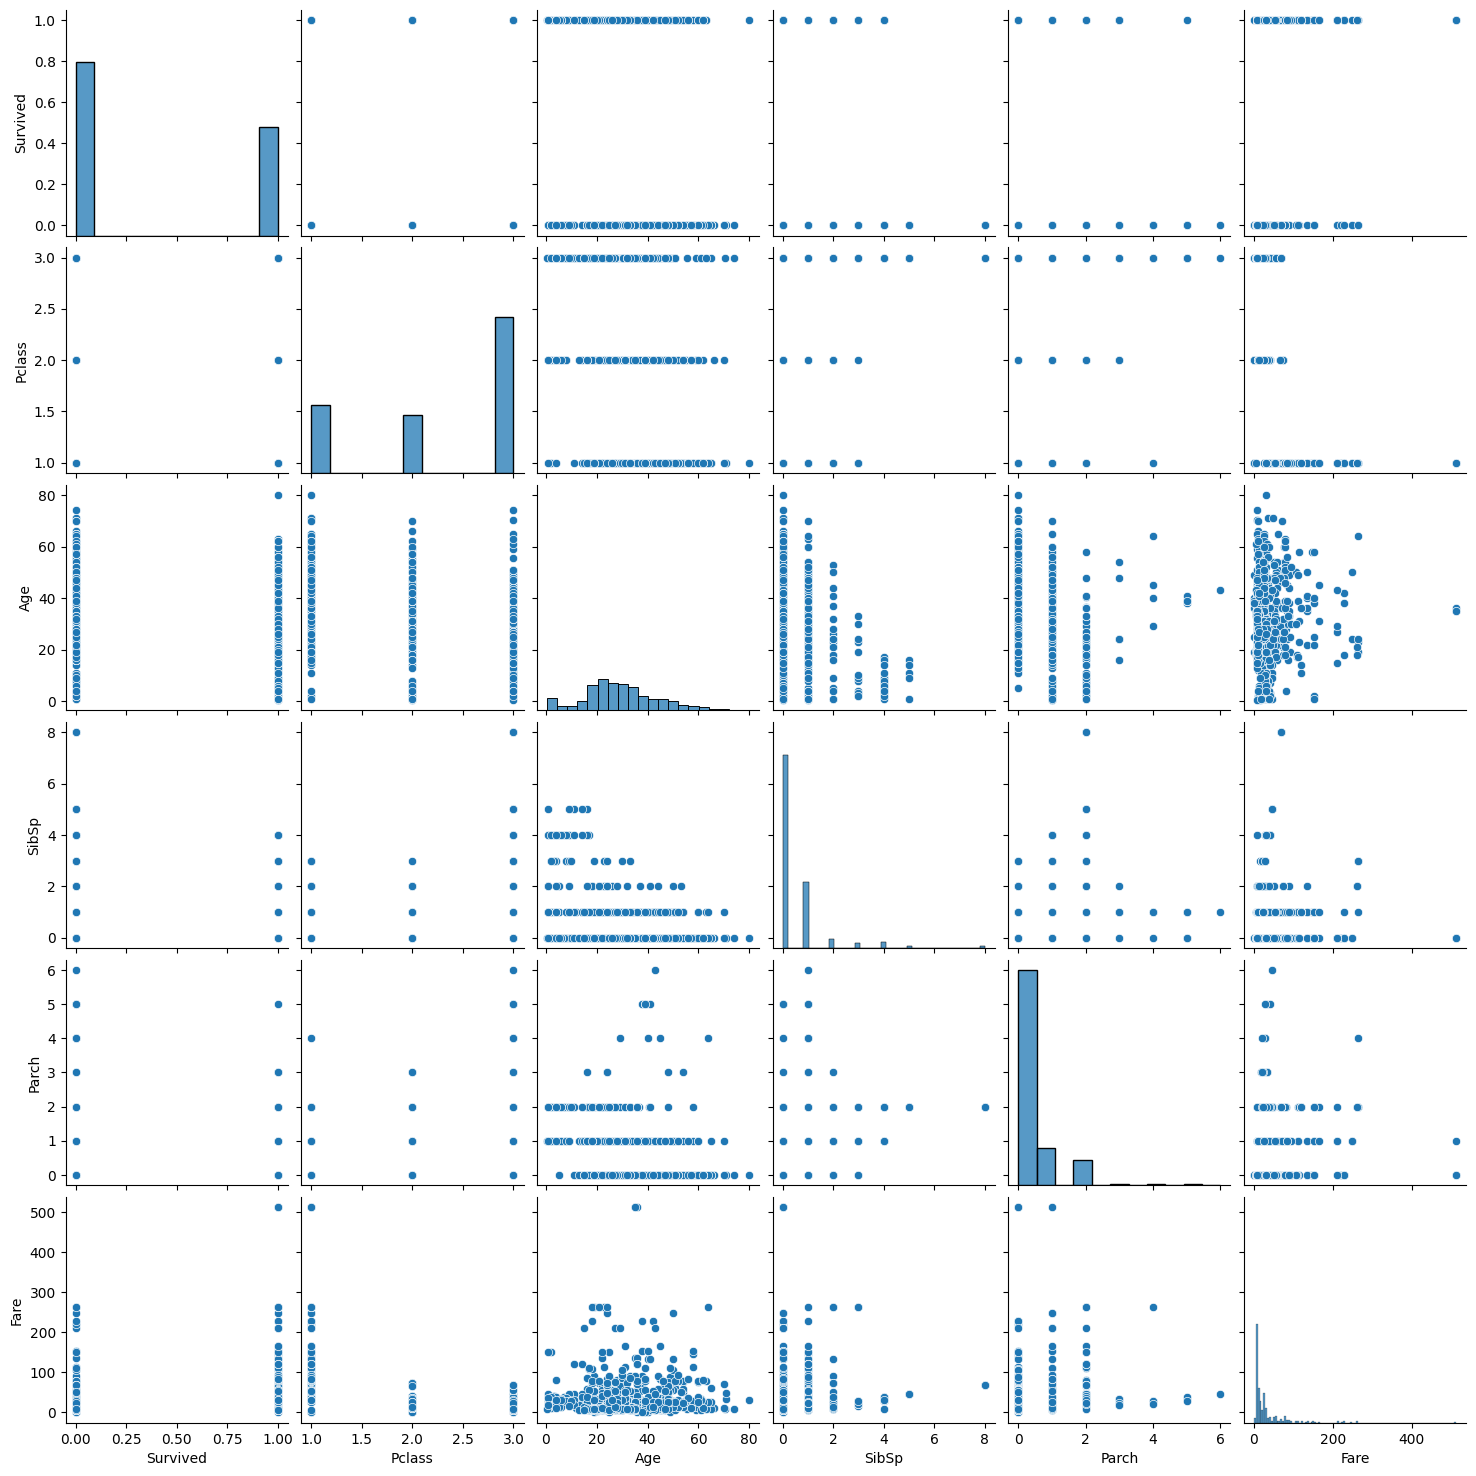

In [53]:
sns.pairplot(df)

In [54]:
df[df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [55]:
df.dropna(subset=['Embarked'],inplace=True)

In [56]:
df[df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [57]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

The rows with the 2 null values for Embarked is removed.

Since the number of null values for null is large, We will fill the null values in age based on the average age found according to their individual Pclass count

In [58]:
result = df.groupby('Pclass')['Age'].agg(['count', 'mean']).reset_index()
print(result)

   Pclass  count       mean
0       1    184  38.105543
1       2    173  29.877630
2       3    355  25.140620


In [59]:
def fillage(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 30
    else:
      return 25
  else:
    return Age


In [60]:
df['Age']=df[['Age','Pclass']].apply(fillage,axis=1)

In [61]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now we have to convert the categorical data into numerical data. Better to convert each unique value inside the column as 0s and 1s to facilitate better classification

In [62]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [63]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [64]:
classp = pd.get_dummies(df['Pclass'], drop_first=True)

In [65]:
dfinal = pd.concat([df,embark,sex,classp],axis='columns')
dfinal

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,male,2,3
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,1,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1,1,1,0
887,1,1,female,19.0,0,0,30.0000,S,0,1,0,0,0
888,0,3,female,25.0,1,2,23.4500,S,0,1,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,0,0,1,0,0


In [66]:
dfinal.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
dfinal

,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,1,1,0
887,1,19.0,0,0,30.0000,0,1,0,0,0
888,0,25.0,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


Now that we have preprocessed the data, lets train the model

In [68]:
Logreg= LogisticRegression()

In [69]:
X=dfinal.drop(['Survived'],axis=1)
Y=dfinal['Survived']

In [112]:
trained_x , test_x , trained_y , test_y = train_test_split(X,Y,test_size=0.3,random_state=1)

In [113]:
print(trained_x)
print(test_x)
print(trained_y)
print(test_y)

      Age  SibSp  Parch      Fare  Q  S  male  2  3
115  21.0      0      0    7.9250  0  1     1  0  1
874  28.0      1      0   24.0000  0  0     0  1  0
77   25.0      0      0    8.0500  0  1     1  0  1
876  20.0      0      0    9.8458  0  1     1  0  1
682  20.0      0      0    9.2250  0  1     1  0  1
..    ...    ...    ...       ... .. ..   ... .. ..
716  38.0      0      0  227.5250  0  0     0  0  0
768  25.0      1      0   24.1500  1  0     1  0  1
73   26.0      1      0   14.4542  0  0     1  0  1
236  44.0      1      0   26.0000  0  1     1  1  0
37   21.0      0      0    8.0500  0  1     1  0  1

[622 rows x 9 columns]
      Age  SibSp  Parch     Fare  Q  S  male  2  3
387  36.0      0      0  13.0000  0  1     0  1  0
259  50.0      0      1  26.0000  0  1     0  1  0
771  48.0      0      0   7.8542  0  1     1  0  1
208  16.0      0      0   7.7500  1  0     0  0  1
683  14.0      5      2  46.9000  0  1     1  0  1
..    ...    ...    ...      ... .. ..   ... .

In [114]:
trained_x.columns=trained_x.columns.astype(str)
test_x.columns=test_x.columns.astype(str)
Logreg.fit(trained_x,trained_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
ypred_train=Logreg.predict(trained_x)
ypred_test=Logreg.predict(test_x)

In [116]:
print(ypred_train)
print(trained_y)

[0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 0 

In [117]:
print(ypred_test)
print(test_y)

[1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0]
387    1
259    1
771    0
208    1
683    0
      ..
248    1
601    0
240    0
468    0
93     0
Name: Survived, Length: 267, dtype: int64


Lets check the Prediction metrics by using confusion matrix and accuracy score to understand how well our model is working

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [122]:
cm=confusion_matrix(test_y,ypred_test)
print(cm)

[[147  19]
 [ 22  79]]


In [123]:
print(accuracy_score(test_y,ypred_test))

0.846441947565543


Meaning we have achieved an 84.64% accuracy in detecting if someone has survived or no

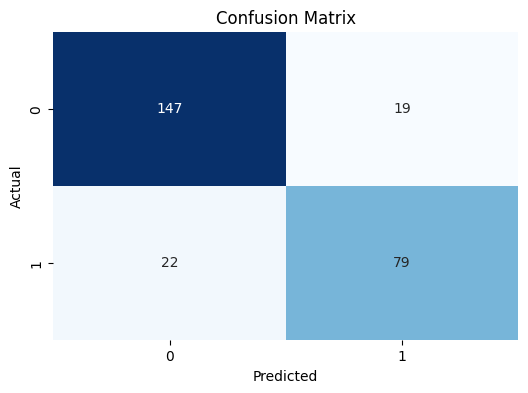

In [124]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
